In [46]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [48]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [ ]:
# Comparing drug use against grades
relevant_cols = ['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)', 
'Which round did you get your coop in?']
drugs_coop = class_df[relevant_cols]

drugs_coop.head(25)

In [ ]:
drugs_coop = drugs_coop[drugs_coop['Which round did you get your coop in?'].notna()]

drugs_coop.head(25)

In [ ]:
drugs_coop.loc[drugs_coop['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] != 'I did not use drugs', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] = 'I used drugs'

drugs_coop.head(10)

In [ ]:
# creating a new data frame for people who did drugs
did_drugs = drugs_coop[drugs_coop['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] == 'I used drugs']
did_drugs

In [ ]:
did_drugs['Number of people'] = did_drugs.groupby(['Which round did you get your coop in?'])['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'].transform('count')
did_drugs

In [ ]:
did_drugs = did_drugs.drop_duplicates(subset=['Which round did you get your coop in?', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)', 'Number of people'], keep='first')
did_drugs

In [ ]:
# creating a new data frame for people who did not use drugs
no_drugs = drugs_coop[drugs_coop['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] == 'I did not use drugs']
no_drugs

In [ ]:
no_drugs['Number of people'] = no_drugs.groupby(['Which round did you get your coop in?'])['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'].transform('count')
no_drugs.head(10)

In [ ]:
no_drugs = no_drugs.drop_duplicates(subset=['Which round did you get your coop in?', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)', 'Number of people'], keep='first')
no_drugs

In [ ]:
did_drugs

In [ ]:
no_drugs

In [ ]:
frames=[did_drugs, no_drugs]
drugs=pd.concat(frames)
drugs

In [ ]:
total_respondants = drugs['Number of people'].sum()
total_respondants
drugs['Percentage of People'] = (drugs['Number of people'] / total_respondants) * 100
drugs

In [ ]:
drugs.rename(columns={"If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)": "Drug Consumption"}, inplace=True)
drugs

In [ ]:
new_index=[0, 14, 4, 7, 18, 2, 1, 23]
drugs=drugs.reindex(new_index)
drugs

Text(14.176543402777774, 0.5, 'Percentage of people (%)')

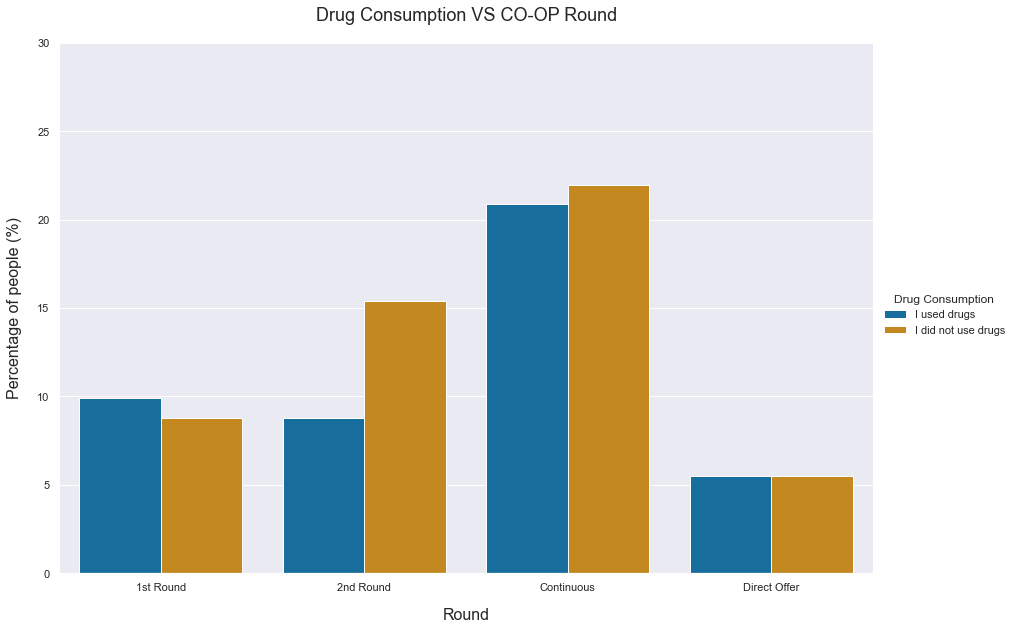

In [66]:
sns.set(font_scale=1.2)
sns.set_theme(palette="colorblind")
ax=sns.catplot(x='Which round did you get your coop in?', y='Percentage of People', hue='Drug Consumption', data=drugs, kind='bar', height=8, aspect=1.5)
ax.set(ylim=(0, 30))
plt.title("Drug Consumption VS CO-OP Round", fontsize=18, y=1.03)
plt.xlabel("Round", labelpad=15, fontsize=16)
plt.ylabel("Percentage of people (%)", labelpad=15, fontsize=16)